### HR-Analysis : Imbalanced Dataset


In [21]:
#Senbagaraman - https://github.com/senbagaraman04/ml-basics/tree/main/2023

## Import the Necessary Libraries

In [22]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

## Read the Data

In [23]:
df = pd.read_csv('./HR_Analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Check for missing/null values

In [24]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing/NA values in the dataset.

In [25]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'DailyRate'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'center': 'EmployeeCount'}>],
       [<AxesSubplot: title={'center': 'EmployeeNumber'}>,
        <AxesSubplot: title={'center': 'EnvironmentSatisfaction'}>,
        <AxesSubplot: title={'center': 'HourlyRate'}>,
        <AxesSubplot: title={'center': 'JobInvolvement'}>,
        <AxesSubplot: title={'center': 'JobLevel'}>],
       [<AxesSubplot: title={'center': 'JobSatisfaction'}>,
        <AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'MonthlyRate'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>,
        <AxesSubplot: title={'center': 'PercentSalaryHike'}>],
       [<AxesSubplot: title={'center': 'PerformanceRating'}>,
        <AxesSubplot: title={'center': 'RelationshipSatisfaction'}>

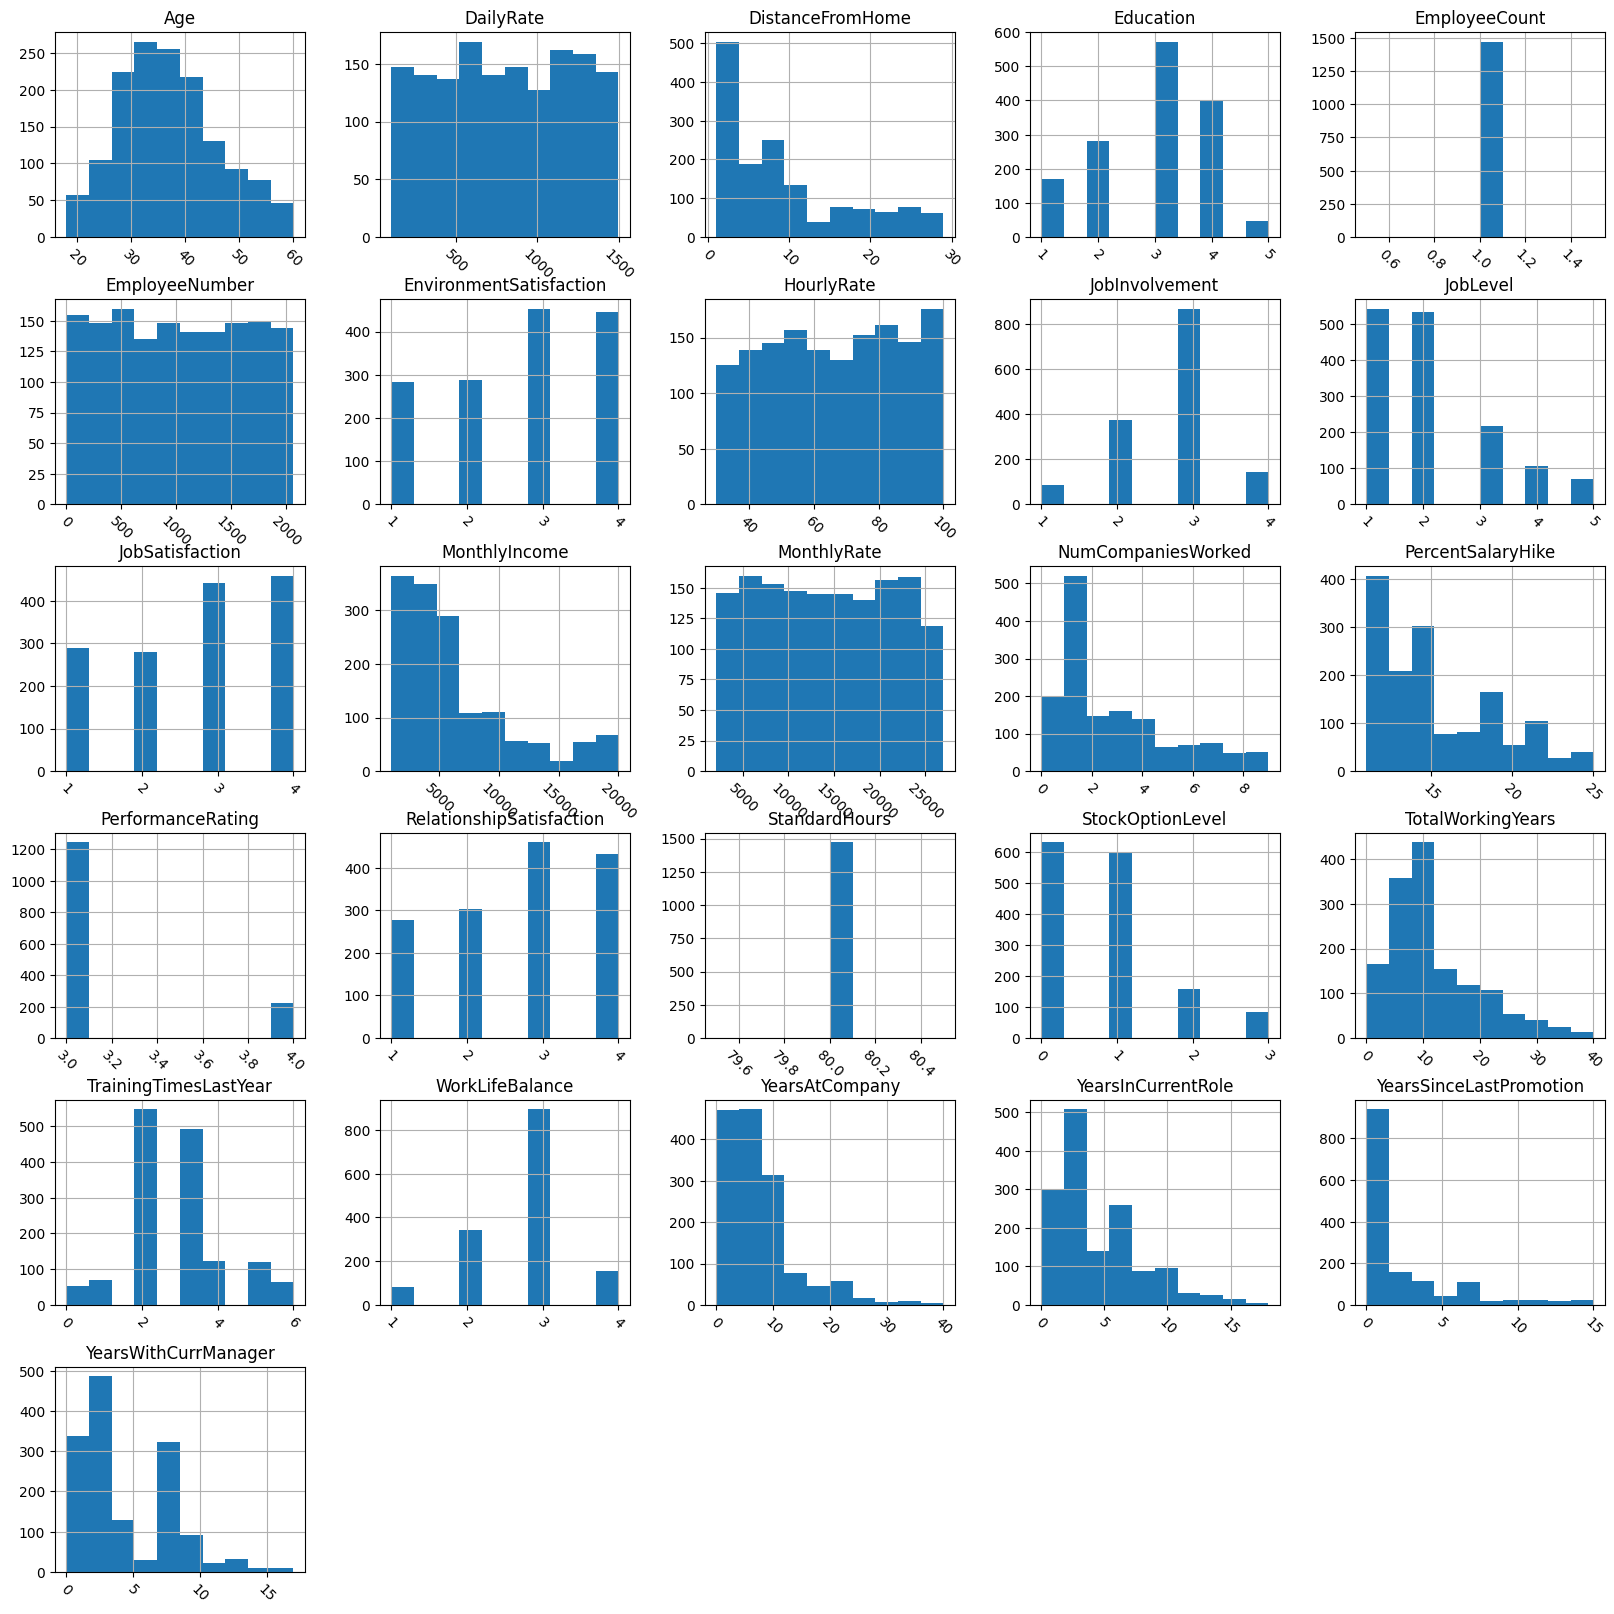

In [26]:
df.hist(figsize=(20,20), xrot=-45)

There are some categorical values like ```business travel```, ```department``` , ```education```. convert these into the nuerical ones using Label encoder.
 



And we also found some columns are not needed based on the values it has, ```over18```, ```standardworkinghrs```, ```count```, ```number```. Drop those columns

In [27]:
df.drop('Over18', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder


for col in df.select_dtypes(['object']).columns:
    le = LabelEncoder()
    label = le.fit_transform(df[col])
    df.drop(col,axis=1, inplace=True)
    df[col]= label

## Find the target variable


In [29]:
target = 'Attrition'
X = df.loc[:, df.columns != target]
Y = df.loc[:, df.columns == target]

<AxesSubplot: xlabel='Attrition', ylabel='count'>

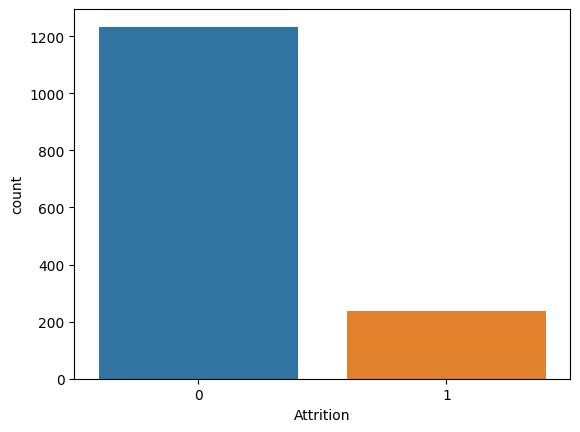

In [30]:
sns.countplot(x=target, data = df)

In [31]:
print(df[target].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


We have sample of 1233 No attributes and 237 of yes attributes. Converting it into percentage roughly equals to the following numbers,

In [32]:
print("%of 0 (No)", 100*(1233/float(df.shape[0])))
print("%of 1 (Yes)", 100*(237/float(df.shape[0])))

%of 0 (No) 83.87755102040816
%of 1 (Yes) 16.122448979591837


<AxesSubplot: >

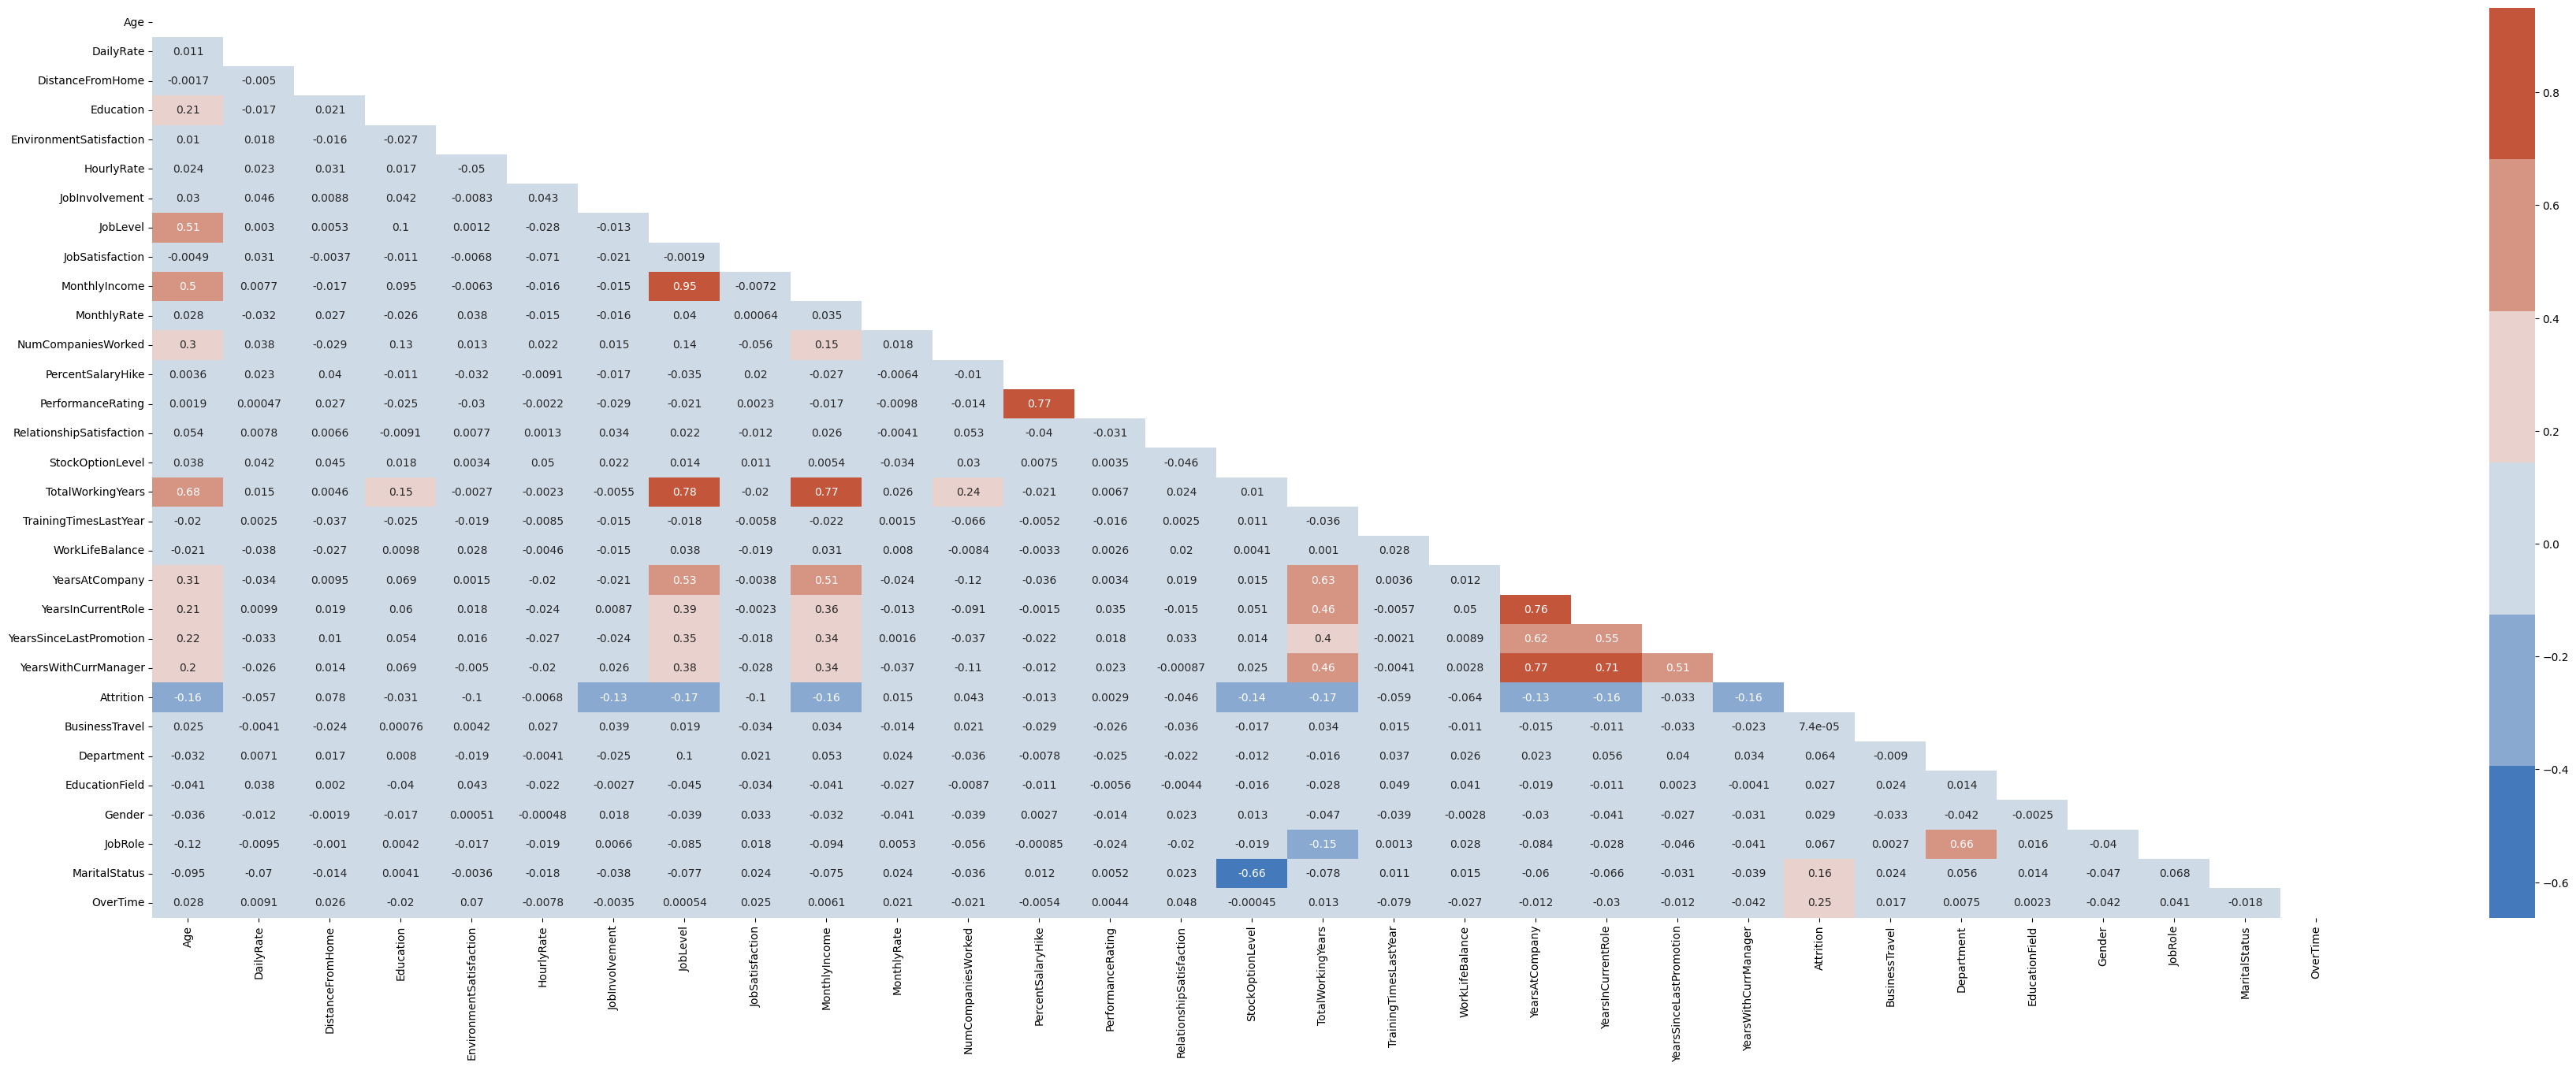

In [33]:
corr = df.corr()

f, ax = plt.subplots(figsize=(45, 15))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(250, 20)

# Draw the heatmap

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Now split the dataset,

## Split the Dataset

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=30)



Find the metrics on the predicted dataset,

```Accuracy``` : The ratio of correct predictions (TP + TN) to the total number of predictions (TP+TN+FP+FN)
 ie., ```[(tp+tn)/(total_count)]```.

```Precision```: The fraction of positive cases correctly identified. 
 ie .. ```[(TP/TP+FP)]

```Recall``` : The fraction of cases that are classified as positive, that are actually positive.

```F1 Score``` : An overall metric tht combines the Accuracy and Precision score (Higher the value, better the model)

## Sampling

In [35]:
# Import the required packages 
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

 

## LR - with prediction done on Plain Test 

In [36]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': range(0,100)}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train, y_train)


# Obtain the performance scores
predictions = grid_lr.predict(X_test)
 
# Store and append the classifier performance metrics to the results DataFrame
results_df = pd.DataFrame(
    data=[["LR", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

# results_df = results_df.append(results_df3, ignore_index=True)


predictions = grid_lr.predict(X_val)
results_df2 = pd.DataFrame(
    data=[["LR (Val)", accuracy_score(y_val, predictions),
           metrics.precision_score(y_val, predictions),
           metrics.recall_score(y_val, predictions), 
           metrics.f1_score(y_val, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(results_df2, ignore_index=True)


print(results_df)

      Model  Accuracy  Precision    Recall  F1 Score        CV
0        LR  0.860544   0.583333  0.311111  0.405797  0.807304
1  LR (Val)  0.901361   0.772727  0.414634  0.539683  0.807304


## KNN

In [37]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train, y_train)
best_knn= grid_knn.best_estimator_

# Obtain the performance scores
predictions = best_knn.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN ", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)




predictions = best_knn.predict(X_val)
results_df2 = pd.DataFrame(
    data=[["KNN (Val)", accuracy_score(y_val, predictions),
           metrics.precision_score(y_val, predictions),
           metrics.recall_score(y_val, predictions), 
           metrics.f1_score(y_val, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(results_df2, ignore_index=True)


print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.583 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.586 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.662 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.583 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.689 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.600 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.613 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.690 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.617 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.674 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.627 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

## SVC

In [38]:
# Import the required packages
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
param_grid = {'svm__C': range(0,10), 'svm__gamma': range(0,10)}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train, y_train)
best_svc= grid_svc.best_estimator_

# Obtain the performance scores
predictions = best_svc.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)



predictions = best_svc.predict(X_val)
results_df2 = pd.DataFrame(
    data=[["SVC (Val)", accuracy_score(y_val, predictions),
           metrics.precision_score(y_val, predictions),
           metrics.recall_score(y_val, predictions), 
           metrics.f1_score(y_val, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(results_df2, ignore_index=True)


print(results_df)

       Model  Accuracy  Precision    Recall  F1 Score        CV
0         LR  0.860544   0.583333  0.311111  0.405797  0.807304
1   LR (Val)  0.901361   0.772727  0.414634  0.539683  0.807304
2       KNN   0.853741   0.750000  0.066667  0.122449  0.689371
3  KNN (Val)  0.877551   1.000000  0.121951  0.217391  0.807304
4        SVC  0.846939   0.000000  0.000000  0.000000  0.828801
5  SVC (Val)  0.860544   0.000000  0.000000  0.000000  0.807304


## Decision Tree

In [39]:
# Define the parameter grid and fit the model
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_
print(best_tree)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100, 3)))
predictions = best_tree.predict(X_test)
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)



predictions = best_tree.predict(X_val)
results_df2 = pd.DataFrame(
    data=[["DT (Val)", accuracy_score(y_val, predictions),
           metrics.precision_score(y_val, predictions),
           metrics.recall_score(y_val, predictions), 
           metrics.f1_score(y_val, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(results_df2, ignore_index=True)

print(results_df)

DecisionTreeClassifier(max_depth=4, random_state=42)
Cross-validated best score 69.786%
       Model  Accuracy  Precision    Recall  F1 Score        CV
0         LR  0.860544   0.583333  0.311111  0.405797  0.807304
1   LR (Val)  0.901361   0.772727  0.414634  0.539683  0.807304
2       KNN   0.853741   0.750000  0.066667  0.122449  0.689371
3  KNN (Val)  0.877551   1.000000  0.121951  0.217391  0.807304
4        SVC  0.846939   0.000000  0.000000  0.000000  0.828801
5  SVC (Val)  0.860544   0.000000  0.000000  0.000000  0.807304
6         DT  0.860544   0.590909  0.288889  0.388060  0.697862
7   DT (Val)  0.850340   0.454545  0.365854  0.405405  0.807304


## Random Forest

In [40]:
# Define the parameter grid and fit the model
param_grid = {'n_estimators':range(0,100)}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print(best_rf)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf.predict(X_test)
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF", accuracy_score(y_test, predictions),
           metrics.precision_score(y_test, predictions),
           metrics.recall_score(y_test, predictions), 
           metrics.f1_score(y_test, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)



predictions = best_rf.predict(X_val)
results_df2 = pd.DataFrame(
    data=[["RF (Val)", accuracy_score(y_val, predictions),
           metrics.precision_score(y_val, predictions),
           metrics.recall_score(y_val, predictions), 
           metrics.f1_score(y_val, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(results_df2, ignore_index=True)


print(results_df)




RandomForestClassifier(n_estimators=45)
Cross-validated best score 80.913%
       Model  Accuracy  Precision    Recall  F1 Score        CV
0         LR  0.860544   0.583333  0.311111  0.405797  0.807304
1   LR (Val)  0.901361   0.772727  0.414634  0.539683  0.807304
2       KNN   0.853741   0.750000  0.066667  0.122449  0.689371
3  KNN (Val)  0.877551   1.000000  0.121951  0.217391  0.807304
4        SVC  0.846939   0.000000  0.000000  0.000000  0.828801
5  SVC (Val)  0.860544   0.000000  0.000000  0.000000  0.807304
6         DT  0.860544   0.590909  0.288889  0.388060  0.697862
7   DT (Val)  0.850340   0.454545  0.365854  0.405405  0.807304
8         RF  0.857143   0.666667  0.133333  0.222222  0.809130
9   RF (Val)  0.867347   0.625000  0.121951  0.204082  0.807304
